In [6]:
from ultralytics import YOLO
import torch

# Check GPU
print("✅ GPU available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ GPU available: True
GPU name: Tesla T4


In [8]:
# Create model
model = YOLO("yolov8s-seg.pt")  # pretrained segmentation model

# Start training
results = model.train(
    data="/content/Turtlebot3-1/data.yaml",  # dataset YAML file from Roboflow
    epochs=50,
    imgsz=640,
    batch=8,
    name="turtlebot3_seg",
    device=0,  # GPU
)


Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Turtlebot3-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=turtlebot3_seg2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

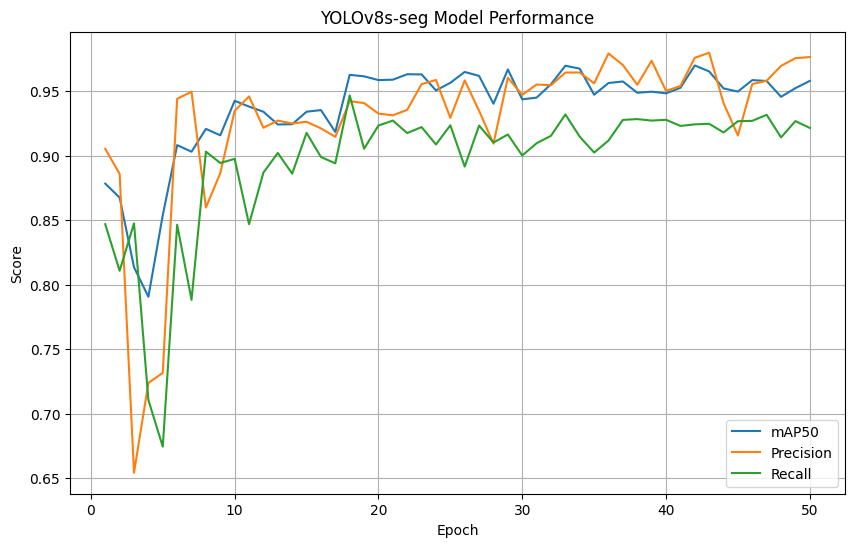

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/runs/segment/turtlebot3_seg2/results.csv")

plt.figure(figsize=(10,6))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50')
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("YOLOv8s-seg Model Performance")
plt.legend()
plt.grid()
plt.show()



image 1/28 /content/Turtlebot3-1/valid/images/img_100_jpg.rf.9114aa825c3e7acbbb6ccef0fcba140e.jpg: 640x640 1 Car, 1 Lane, 20.9ms
image 2/28 /content/Turtlebot3-1/valid/images/img_103_jpg.rf.2a877e4e23d355750cb836d72b9d3f8e.jpg: 640x640 1 Car, 3 Lanes, 21.0ms
image 3/28 /content/Turtlebot3-1/valid/images/img_104_jpg.rf.3cc030abd1967f61de085b2c9725cc70.jpg: 640x640 1 Car, 3 Lanes, 20.9ms
image 4/28 /content/Turtlebot3-1/valid/images/img_109_jpg.rf.d2730d51395021a3d2140d2b14afb741.jpg: 640x640 1 Car, 2 Lanes, 1 Obstacle, 20.9ms
image 5/28 /content/Turtlebot3-1/valid/images/img_112_jpg.rf.d69683fc5a307f08f904b269d8d5dfab.jpg: 640x640 1 Car, 4 Lanes, 1 Obstacle, 27.0ms
image 6/28 /content/Turtlebot3-1/valid/images/img_121_jpg.rf.5e813baccf952b6cd5513c8cc4b1cf4e.jpg: 640x640 1 Car, 2 Lanes, 1 Obstacle, 30.3ms
image 7/28 /content/Turtlebot3-1/valid/images/img_123_jpg.rf.308150d98a513d08738da977e889c6a9.jpg: 640x640 1 Car, 1 Lane, 1 Obstacle, 19.6ms
image 8/28 /content/Turtlebot3-1/valid/imag

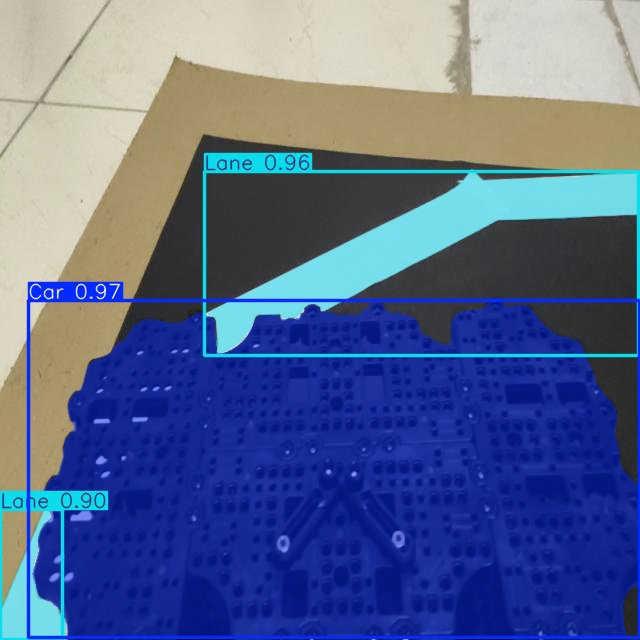

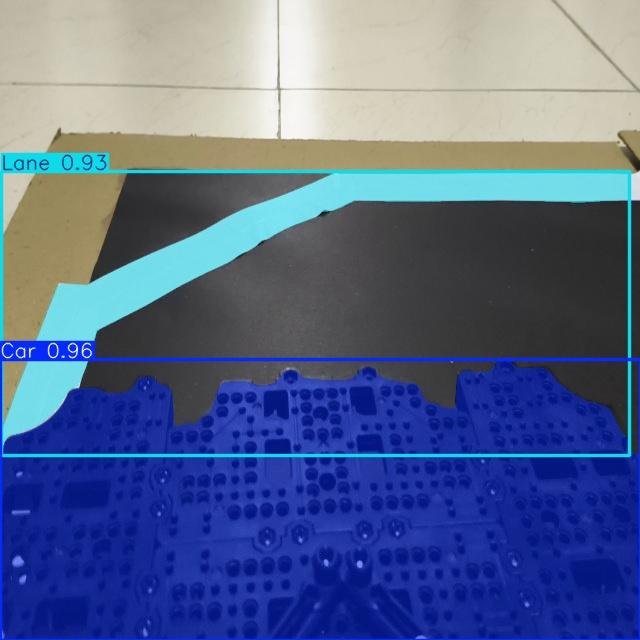

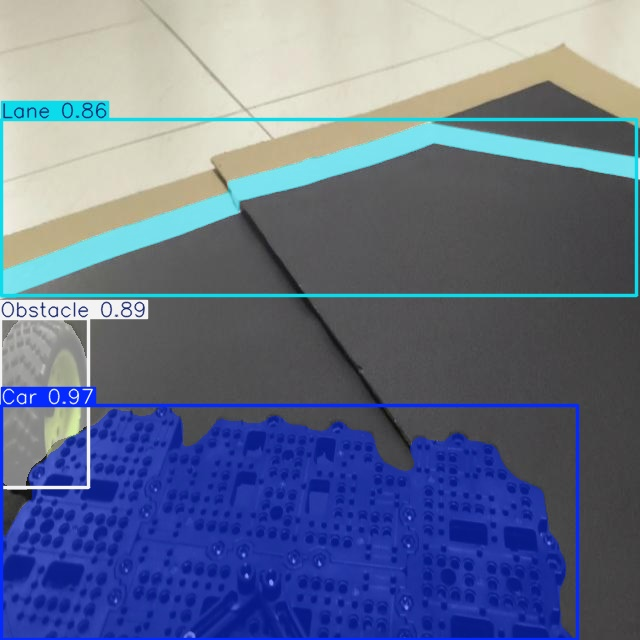

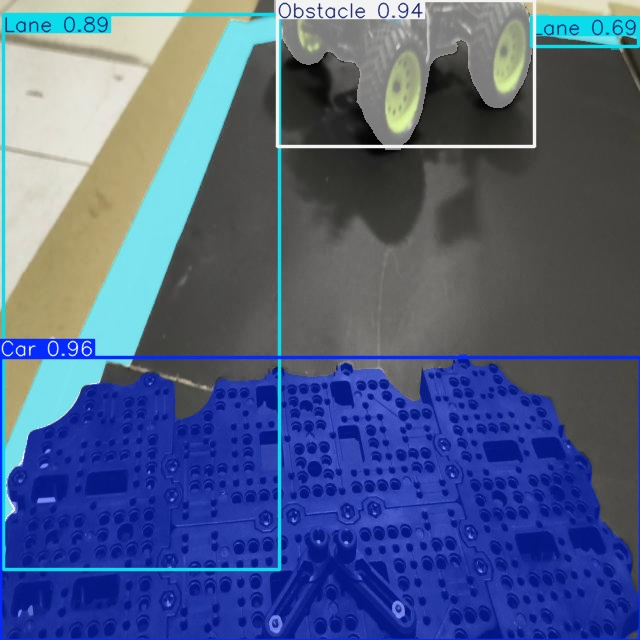

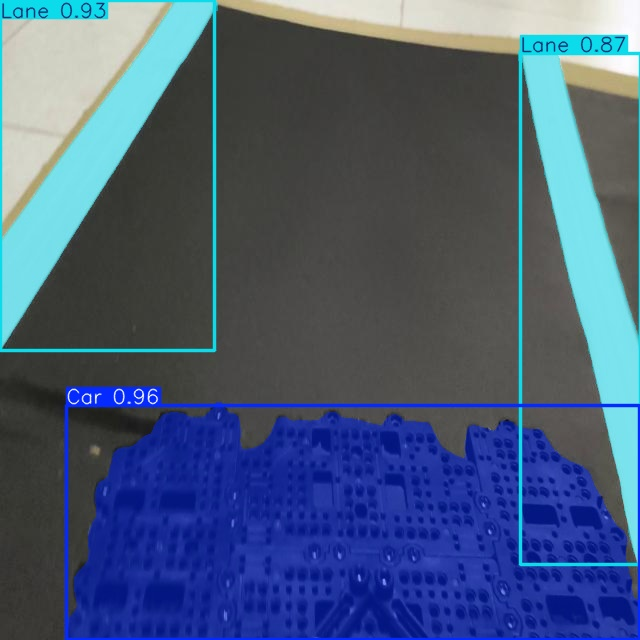

In [13]:
# Run predictions on validation set
results = model.predict(source="/content/Turtlebot3-1/valid/images", save=True, conf=0.5)

# The results are saved in:
print("Saved predictions to:", results[0].save_dir)


import glob
from IPython.display import Image, display

for image_path in glob.glob(f"{results[0].save_dir}/*.jpg")[:5]:
    display(Image(filename=image_path))